# Essential libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset

In [2]:
file_path = './Data/Sales-Export_2019-2020.csv'  
df = pd.read_csv(file_path)

df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            1000 non-null   object 
 1    order_value_EUR   1000 non-null   object 
 2    cost              1000 non-null   float64
 3   date               1000 non-null   object 
 4   category           1000 non-null   object 
 5   customer_name      1000 non-null   object 
 6   sales_manager      1000 non-null   object 
 7   sales_rep          1000 non-null   object 
 8   device_type        1000 non-null   object 
 9   order_id           1000 non-null   object 
dtypes: float64(1), object(9)
memory usage: 78.2+ KB


,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id
0,Sweden,"17,524.02",14122.61,2/12/2020,Books,Goldner-Dibbert,Maxie Marrow,Madelon Bront,Mobile,70-0511466
1,Finland,"116,563.40",92807.78,9/26/2019,Games,Hilll-Vandervort,Hube Corey,Wat Bowkley,Mobile,28-6585323
2,Portugal,"296,465.56",257480.34,7/11/2019,Clothing,Larkin-Collier,Celine Tumasian,Smitty Culverhouse,PC,58-7703341
3,Portugal,"74,532.02",59752.32,4/2/2020,Beauty,Hessel-Stiedemann,Celine Tumasian,Aurelie Wren,PC,14-6700183
4,Spain,"178,763.42",146621.76,12/22/2019,Games,Johns and Sons,Emalia Dinse,Bertha Walbrook,Tablet,15-8765160


In [ ]:
print("Missing Values:\n", df.isnull().sum())
df = df.dropna() 
df['date'] = pd.to_datetime(df['date'])
df = df.drop_duplicates()
print("Data Types:\n", df.dtypes)


Missing Values:
 country              0
 order_value_EUR     0
 cost                0
date                 0
category             0
customer_name        0
sales_manager        0
sales_rep            0
device_type          0
order_id             0
dtype: int64
Data Types:
 country                      object
 order_value_EUR             object
 cost                       float64
date                 datetime64[ns]
category                     object
customer_name                object
sales_manager                object
sales_rep                    object
device_type                  object
order_id                     object
dtype: object


In [8]:
df.columns

Index(['country', ' order_value_EUR ', ' cost ', 'date', 'category',
       'customer_name', 'sales_manager', 'sales_rep', 'device_type',
       'order_id', 'year', 'month', 'day', 'weekday'],
      dtype='object')

# Data Preprocessing

In [19]:
df.columns = df.columns.str.strip()
df['order_value_EUR'] = df['order_value_EUR'].str.strip()

In [20]:
df['order_value_EUR'] = df['order_value_EUR'].str.replace(',', '', regex=True)

In [15]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.day_name()

In [22]:
print(df['order_value_EUR'].isna().sum()) 

0


In [23]:
df['order_value_EUR'] = df['order_value_EUR'].astype(float)

In [24]:
df['profit'] = df['order_value_EUR'] - df['cost']

# EDA

Group by category and calculate total sales

C:\Users\hp\AppData\Local\Temp\ipykernel_8276\4208501515.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


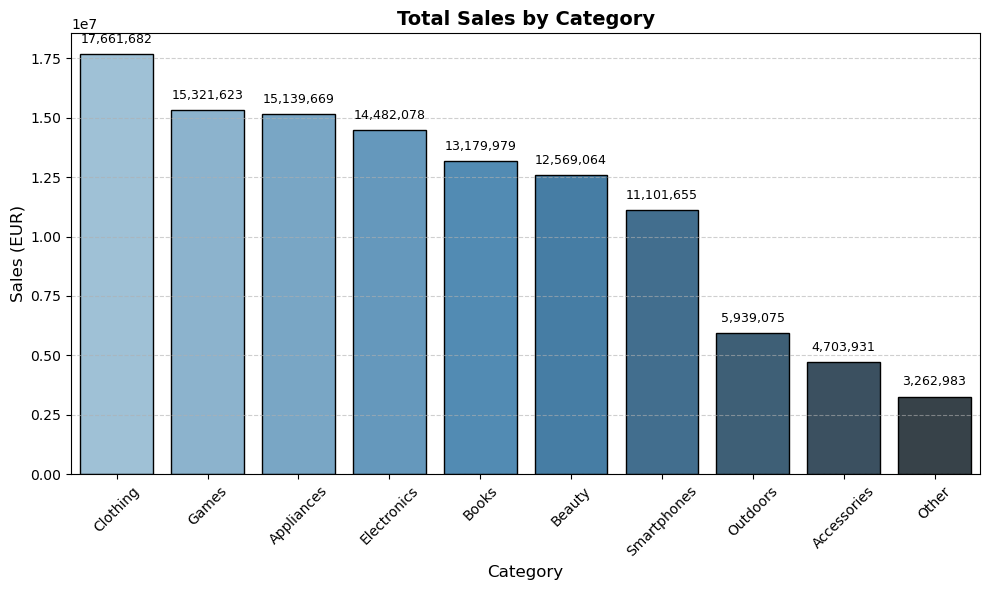

In [ ]:
category_sales = df.groupby('category')['order_value_EUR'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=category_sales.index,
    y=category_sales.values,
    palette="Blues_d",
    edgecolor="black"
)
for i, val in enumerate(category_sales.values):
    plt.text(i, val + (0.02 * max(category_sales.values)), f"{val:,.0f}", 
             ha='center', va='bottom', fontsize=9)
plt.title("Total Sales by Category", fontsize=14, fontweight='bold')
plt.xlabel("Category", fontsize=12)
plt.ylabel("Sales (EUR)", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Show plot
plt.show()

Group by year and calculate total profit

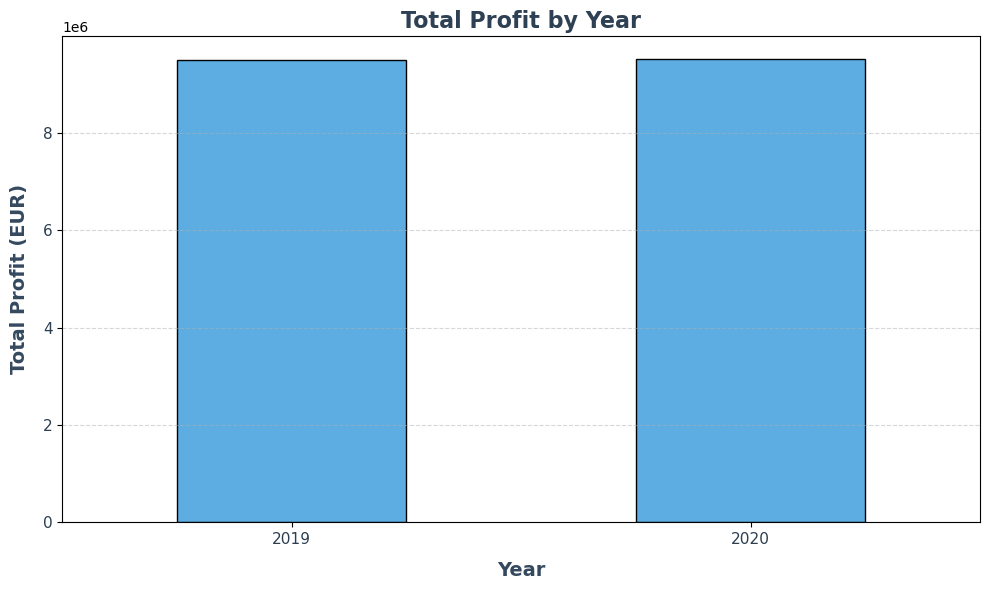

In [41]:
yearly_profit = df.groupby('year')['profit'].sum()


plt.figure(figsize=(10, 6)) 
yearly_profit.plot(kind='bar', color='#5DADE2', edgecolor="black")  

# Styling the plot
plt.title("Total Profit by Year", fontsize=16, fontweight='bold', color="#2E4053")
plt.xlabel("Year", fontsize=14, labelpad=10, fontweight='semibold', color="#34495E")
plt.ylabel("Total Profit (EUR)", fontsize=14, labelpad=10, fontweight='semibold', color="#34495E")
plt.xticks(fontsize=11, color="#2C3E50", fontweight='medium', rotation=0)
plt.yticks(fontsize=11, color="#2C3E50", fontweight='medium')

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()


Group by country and calculate total sales

C:\Users\hp\AppData\Local\Temp\ipykernel_8276\2784600445.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette="rocket", edgecolor="black")


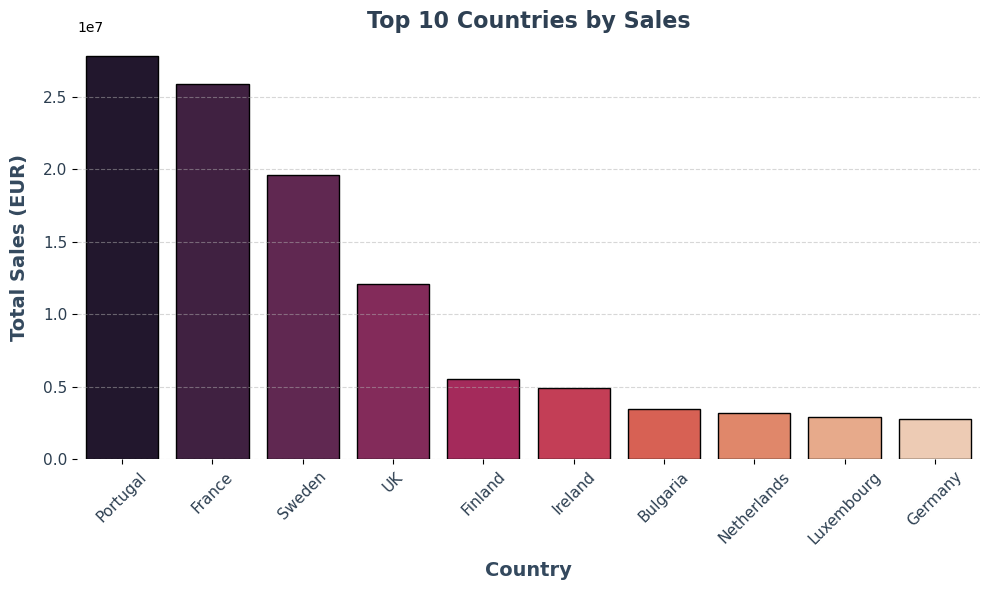

In [28]:
country_sales = df.groupby('country')['order_value_EUR'].sum().sort_values(ascending=False)

top_countries = country_sales.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette="rocket", edgecolor="black")

plt.title("Top 10 Countries by Sales", fontsize=16, fontweight='bold', color="#2E4053")
plt.xlabel("Country", fontsize=14, labelpad=10, fontweight='semibold', color="#34495E")
plt.ylabel("Total Sales (EUR)", fontsize=14, labelpad=10, fontweight='semibold', color="#34495E")
plt.xticks(rotation=45, fontsize=11, color="#2C3E50", fontweight='medium')
plt.yticks(fontsize=11, color="#2C3E50", fontweight='medium')

plt.grid(axis='y', linestyle='--', alpha=0.5)
sns.despine(left=True, bottom=True)

plt.tight_layout()

plt.show()


Device type distribution

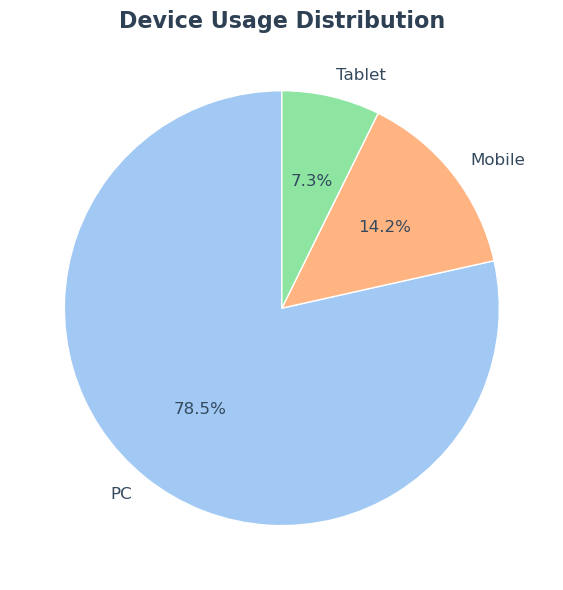

In [29]:
device_counts = df['device_type'].value_counts()

plt.figure(figsize=(8, 6))
device_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=sns.color_palette("pastel"),
    textprops={'fontsize': 12, 'color': "#34495E"},
    startangle=90,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)

# Styling the plot
plt.title("Device Usage Distribution", fontsize=16, fontweight='bold', color="#2E4053")
plt.ylabel("")  # Remove default y-axis label for cleaner look

plt.tight_layout()

plt.show()


Convert date column to datetime if not already

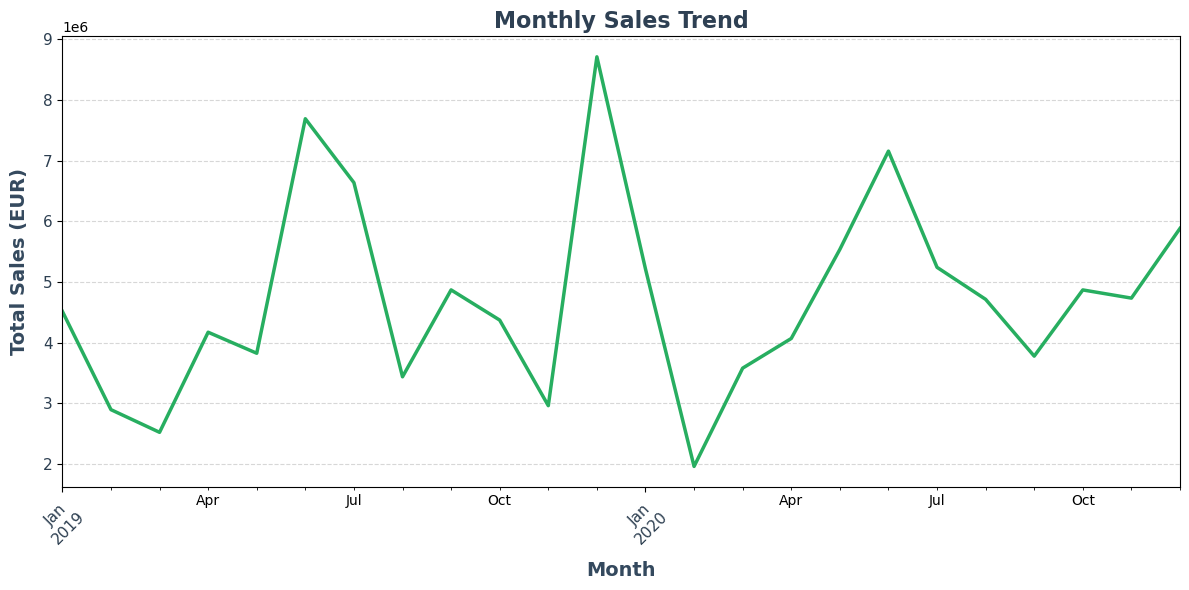

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['year_month'] = df['date'].dt.to_period('M')
monthly_sales = df.groupby('year_month')['order_value_EUR'].sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot(color='#27AE60', linewidth=2.5)

plt.title("Monthly Sales Trend", fontsize=16, fontweight='bold', color="#2E4053")
plt.xlabel("Month", fontsize=14, labelpad=10, fontweight='semibold', color="#34495E")
plt.ylabel("Total Sales (EUR)", fontsize=14, labelpad=10, fontweight='semibold', color="#34495E")
plt.xticks(fontsize=11, rotation=45, color="#2C3E50")
plt.yticks(fontsize=11, color="#2C3E50")
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


Group by category and calculate total profit and sales

C:\Users\hp\AppData\Local\Temp\ipykernel_8276\1430544425.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_performance.index, y=category_performance['profit_margin'], palette="magma", edgecolor="black")


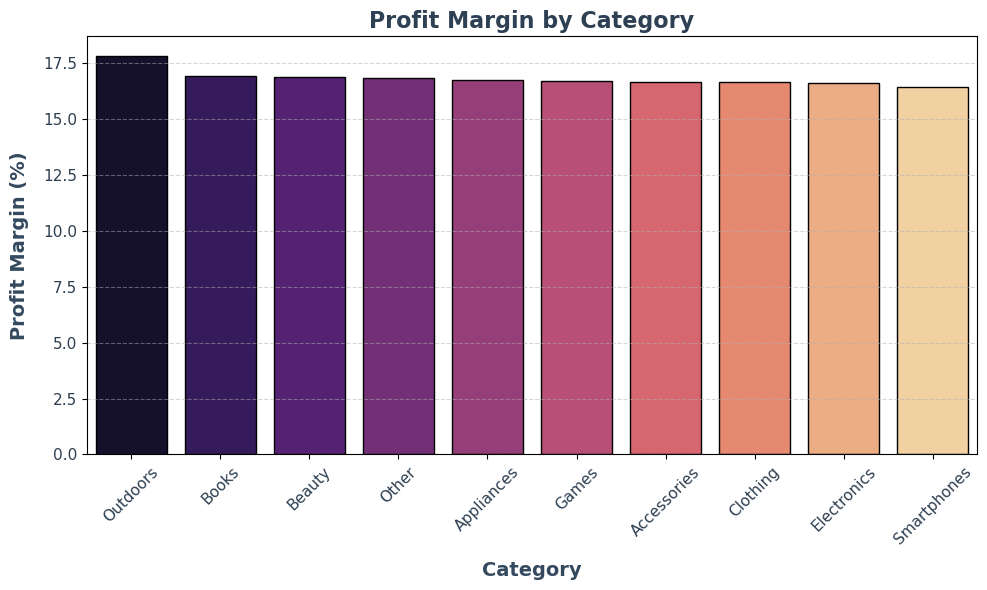

In [32]:
category_performance = df.groupby('category').agg({'profit': 'sum', 'order_value_EUR': 'sum'})
category_performance['profit_margin'] = (category_performance['profit'] / category_performance['order_value_EUR']) * 100
category_performance = category_performance.sort_values('profit_margin', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=category_performance.index, y=category_performance['profit_margin'], palette="magma", edgecolor="black")

plt.title("Profit Margin by Category", fontsize=16, fontweight='bold', color="#2E4053")
plt.xlabel("Category", fontsize=14, labelpad=10, fontweight='semibold', color="#34495E")
plt.ylabel("Profit Margin (%)", fontsize=14, labelpad=10, fontweight='semibold', color="#34495E")
plt.xticks(rotation=45, fontsize=11, color="#2C3E50")
plt.yticks(fontsize=11, color="#2C3E50")
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


Group by customer and calculate total sales

C:\Users\hp\AppData\Local\Temp\ipykernel_8276\730827474.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_lifetime_value.index, y=customer_lifetime_value.values, palette="cool", edgecolor="black")


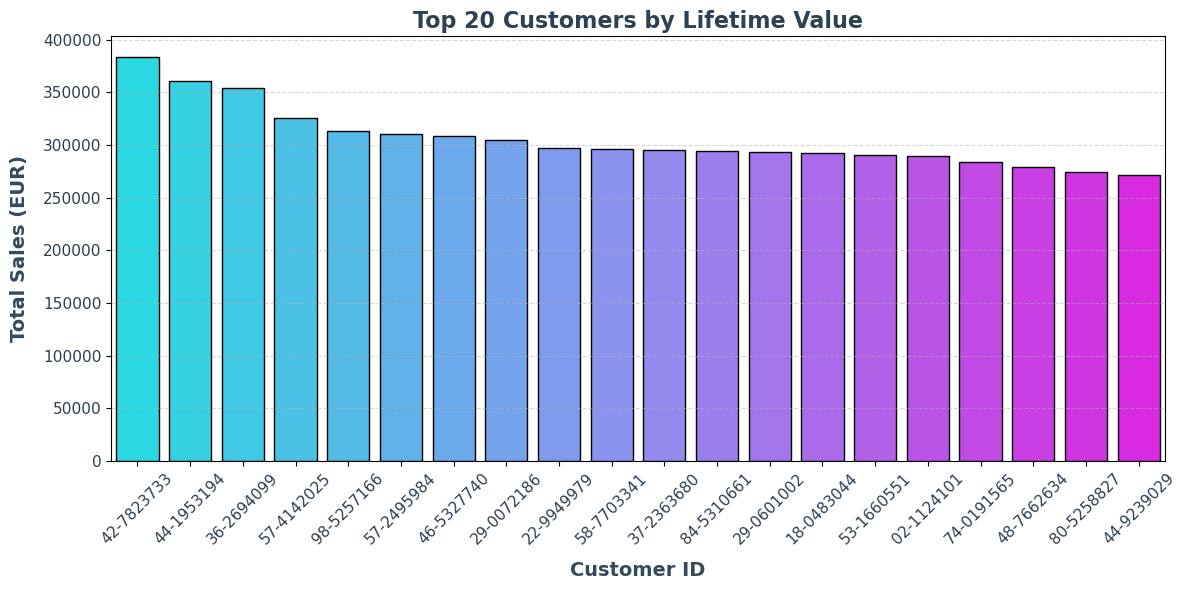

In [40]:
customer_lifetime_value = df.groupby('order_id')['order_value_EUR'].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=customer_lifetime_value.index, y=customer_lifetime_value.values,  hue=customer_lifetime_value.index, palette="cool", edgecolor="black")

plt.title("Top 20 Customers by Lifetime Value", fontsize=16, fontweight='bold', color="#2E4053")
plt.xlabel("Customer ID", fontsize=14, labelpad=10, fontweight='semibold', color="#34495E")
plt.ylabel("Total Sales (EUR)", fontsize=14, labelpad=10, fontweight='semibold', color="#34495E")
plt.xticks(rotation=45, fontsize=11, color="#2C3E50")
plt.yticks(fontsize=11, color="#2C3E50")
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


Group by region and calculate total sales

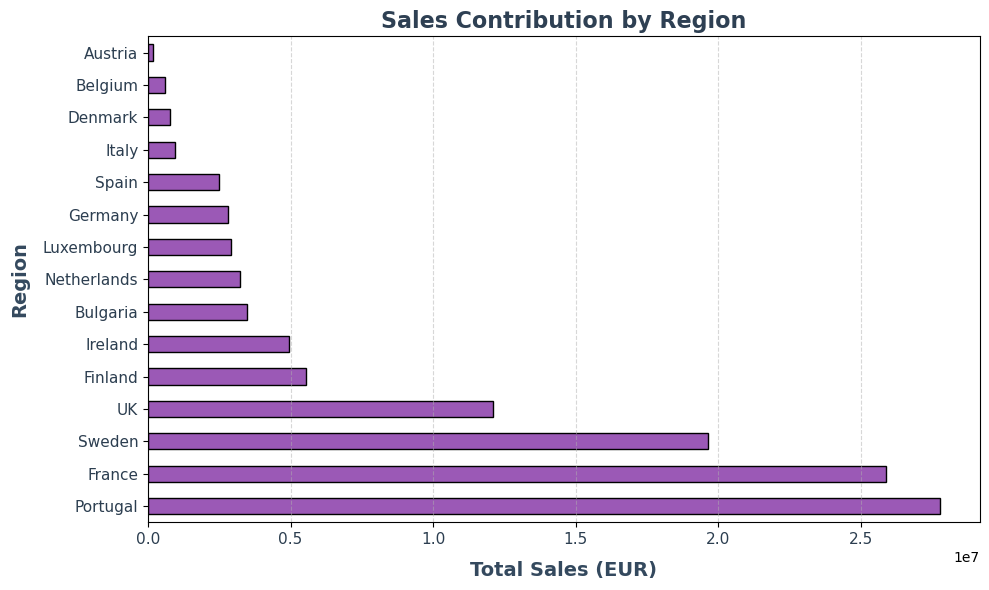

In [37]:

region_sales = df.groupby('country')['order_value_EUR'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
region_sales.plot(kind='barh', color='#9B59B6', edgecolor="black")
plt.title("Sales Contribution by Region", fontsize=16, fontweight='bold', color="#2E4053")
plt.xlabel("Total Sales (EUR)", fontsize=14, labelpad=10, fontweight='semibold', color="#34495E")
plt.ylabel("Region", fontsize=14, labelpad=10, fontweight='semibold', color="#34495E")
plt.xticks(fontsize=11, color="#2C3E50")
plt.yticks(fontsize=11, color="#2C3E50")
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()
